# Visualizations

## Matplotlib settings:
`plt.rcParams` controls the default styles and behaviors of plots. There are [a lot of options](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.RcParams).

The common ones are:
- plt.rcParams['figure.figsize']: Default size of the figure in inches.
- plt.rcParams['figure.dpi']: Resolution of the figure in dots per inch
- plt.rcParams['axes.titlesize']
- plt.rcParams['axes.labelsize']
- plt.rcParams['font.size']
- plt.rcParams['font.family']
- plt.rcParams['lines.linewidth']
- plt.rcParams['legend.loc']

Reset rcParams to default with: `plt.rcdefaults()`

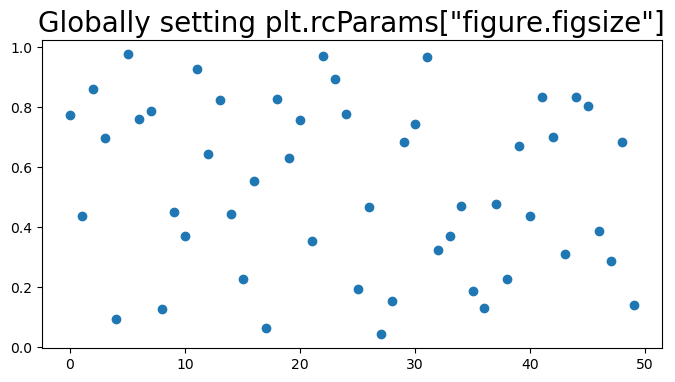

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (8, 4)

rng = np.random.default_rng(42)

plt.scatter(np.arange(50), rng.random(50), color='tab:blue')
plt.title('Globally setting plt.rcParams["figure.figsize"]', fontsize=20)
plt.show()

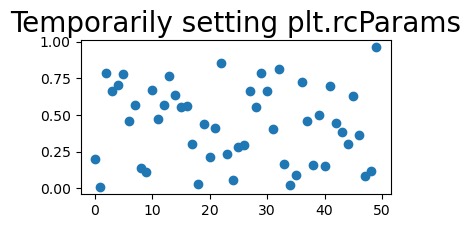

In [3]:
with plt.rc_context({'figure.figsize': [4, 2], 'axes.titlesize': 20}):
    plt.scatter(np.arange(50), rng.random(50), color='tab:blue')
    plt.title('Temporarily setting plt.rcParams')
    plt.show()

[Matplotlib has a list of named colors here](https://matplotlib.org/stable/gallery/color/named_colors.html)

[Coolors is also a great website for picking color palletes](https://coolors.co/palettes/trending)

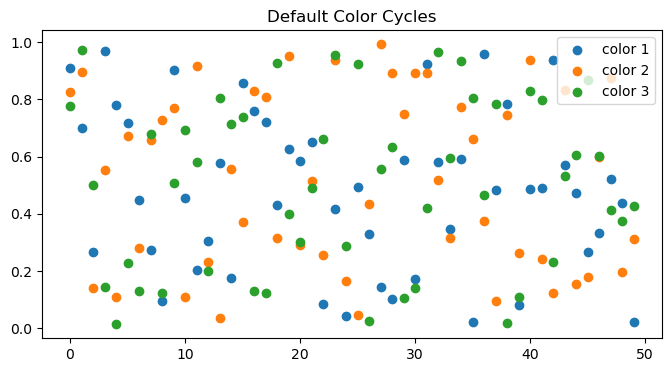

In [4]:
plt.scatter(np.arange(50), rng.random(50), label='color 1')
plt.scatter(np.arange(50), rng.random(50), label='color 2')
plt.scatter(np.arange(50), rng.random(50), label='color 3')
plt.title('Default Color Cycles')
plt.legend()
plt.show()

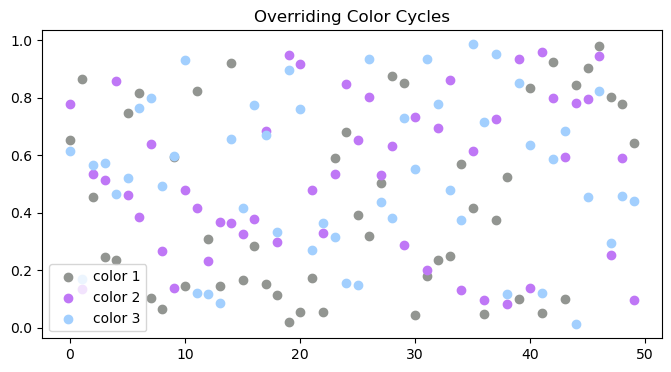

In [5]:
from cycler import cycler

new_color_cycle = cycler(color=['#929591', '#bf77f6', '#a2cffe'])

with plt.rc_context({'axes.prop_cycle': new_color_cycle}):
    plt.scatter(np.arange(50), rng.random(50), label='color 1')
    plt.scatter(np.arange(50), rng.random(50), label='color 2')
    plt.scatter(np.arange(50), rng.random(50), label='color 3')
    plt.title('Overriding Color Cycles')
    plt.legend()
    plt.show()

### Subplots
When you create a grid of subplots using `plt.subplots(rows, cols)`, Matplotlib returns an array of Axes objects that can be accessed with `axs[row, column]`.

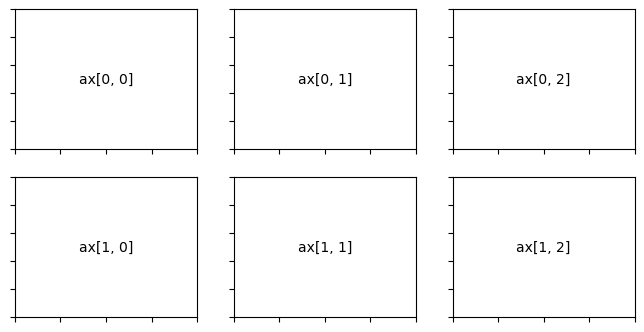

In [6]:
rows = 2
columns = 3
fig, axs = plt.subplots(rows, columns)

for row in range(rows):
    for col in range(columns):
        axs[row, col].text(0.5, 0.5, f"ax[{row}, {col}]", va="center", ha="center")
        axs[row, col].tick_params(labelbottom=False, labelleft=False)


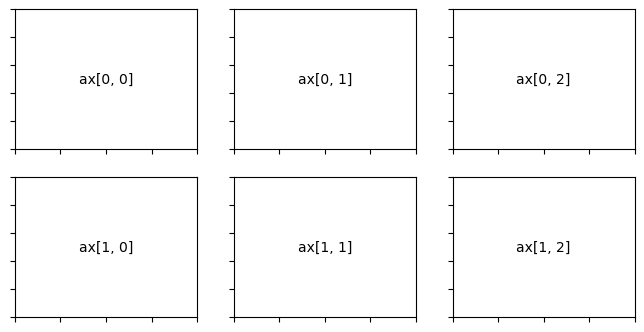

In [7]:
fig, axs = plt.subplots(2, 3)  # 2 rows, 3 columns
axs = axs.flatten()

for idx, ax in enumerate(axs):
    row = idx // 3
    col = idx % 3
    ax.text(0.5, 0.5, f"ax[{row}, {col}]", va="center", ha="center")
    ax.tick_params(labelbottom=False, labelleft=False)


`sharex=True` allows the subplots to use the same x-axis.

`ax.set()` can be used to set multiple properties at once.

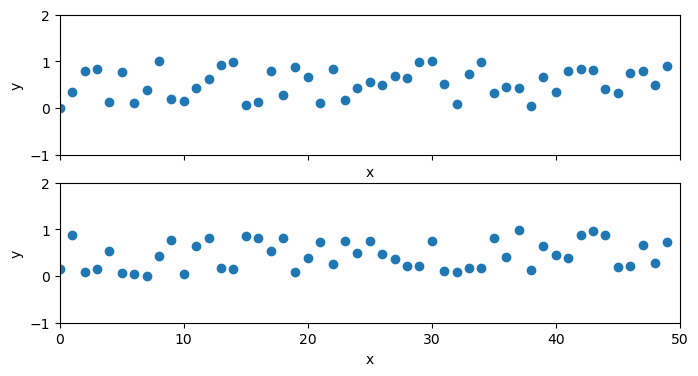

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(8, 4), sharex=True)

for ax in axs:
    ax.scatter(np.arange(50), rng.random(50))
    ax.set(xlim=(0, 50), ylim=(-1, 2), xlabel='x', ylabel='y', title='')

### `plt` versus `ax`:
- `plt.xlabel()` → `ax.set_xlabel()`
- `plt.ylabel()` → `ax.set_ylabel()`
- `plt.xlim()` → `ax.set_xlim()`
- `plt.ylim()` → `ax.set_ylim()`
- `plt.title()` → `ax.set_title()`

## Gestalt's Six Principles of Visual Perception 
Define how people interact with and create order out of visual stimuli. 

### Perceptual grouping
#### Proximity
We perceive objects that are physically close together as belonging to part of a group.

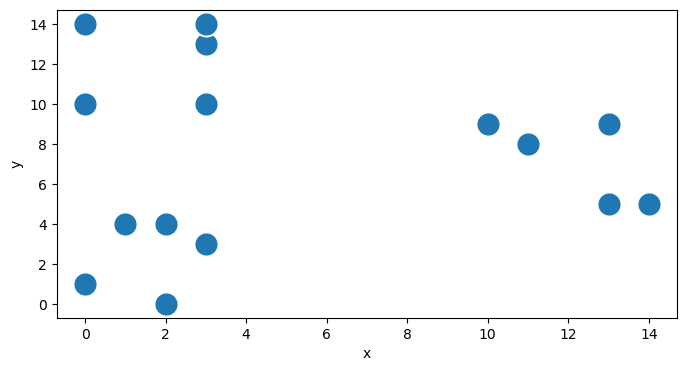

In [6]:
group_size = 5
group0 = rng.integers(low=0, high=5, size=(group_size,2))
group1 = rng.integers(low=[[10], [5]], high=[[15], [10]], size=(2, group_size)).T
group2 = rng.integers(low=[[0], [10]], high=[[5], [15]], size=(2, group_size)).T
df = pd.DataFrame(np.concatenate([group0, group1, group2]), columns=['x', 'y'])
df['group'] = df.index // group_size

sns.scatterplot(data=df, x='x', y='y', s=300)
plt.show()

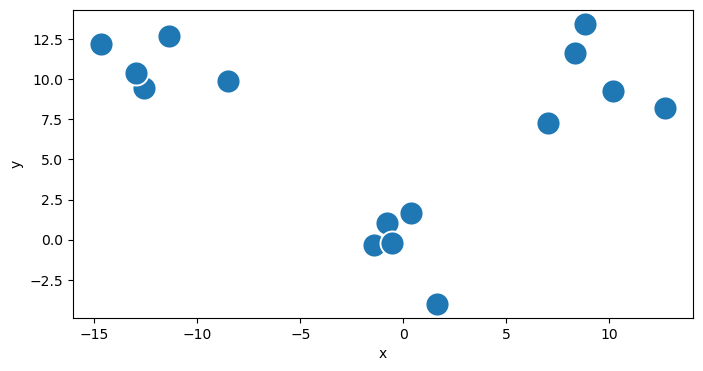

In [7]:
group_size = 5
group0 = rng.normal(loc=0, scale=2.0, size=(group_size, 2))
group1 = rng.normal(loc=10, scale=2.0, size=(2, group_size)).T
group2 = rng.normal(loc=10, scale=2.0, size=(2, group_size)).T
df = pd.DataFrame(np.concatenate([group0, group1, group2]), columns=['x', 'y'])
df['group'] = df.index // group_size
df.loc[df.group==1, 'x'] -= 20

sns.scatterplot(data=df, x='x', y='y', s=300)
plt.show()

### Similarity
Objects that are of similar color, shape, size, or orientation are perceived as related or belonging to part of a group.

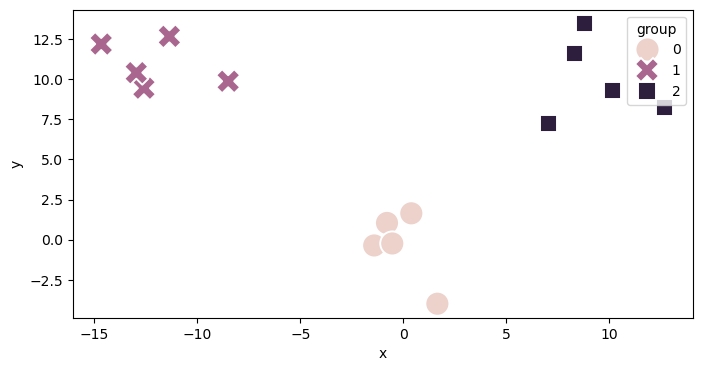

In [8]:
sns.scatterplot(data=df, x='x', y='y', hue="group", style="group", s=300)
plt.show()

### Enclosure
objects that are physically enclosed together as belonging to part of a group.

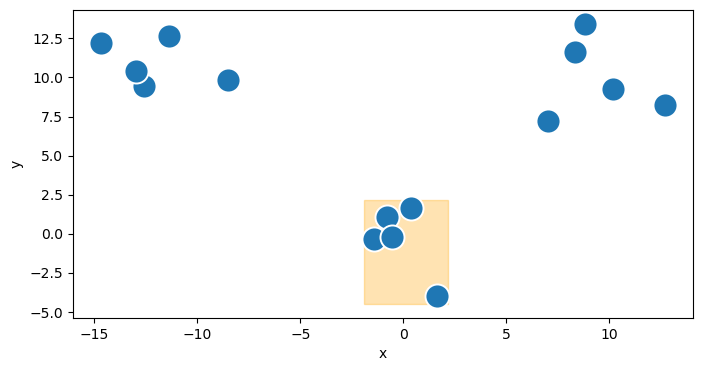

In [9]:
x_min = df.loc[df.group==0, 'x'].min() - 0.5
x_max = df.loc[df.group==0, 'x'].max() + 0.5
y_min = df.loc[df.group==0, 'y'].min() - 0.5
y_max = df.loc[df.group==0, 'y'].max() + 0.5
highlight = plt.Rectangle((x_min, y_min), 
                          x_max-x_min, y_max-y_min, 
                          color='orange', alpha=0.3)
plt.gca().add_patch(highlight)
sns.scatterplot(data=df, x='x', y='y', s=300)
plt.show()

### Closure
People like things to be simple and to fit in the constructs that are already in our heads

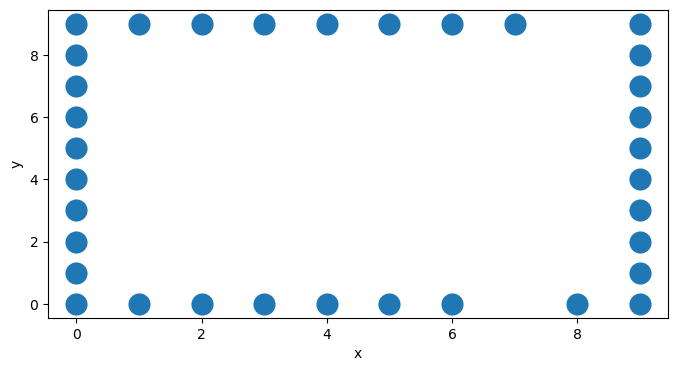

In [10]:
edge_points = 20
left = rng.integers(low=[[0], [0]], high=[[1], [10]], size=(2, edge_points)).T
right = rng.integers(low=[[9], [0]], high=[[10], [10]], size=(2, edge_points)).T
top = rng.integers(low=[[0], [9]], high=[[10], [10]], size=(2, edge_points)).T
bottom = rng.integers(low=[[0], [0]], high=[[10], [1]], size=(2, edge_points)).T
df = pd.DataFrame(np.concatenate([left, right, top, bottom]), columns=['x', 'y'])

sns.scatterplot(data=df, x='x', y='y', s=300)
plt.show()

### Continuity
Our eyes seek the smoothest path and naturally create continuity in what we see even where it may not explicitly exist

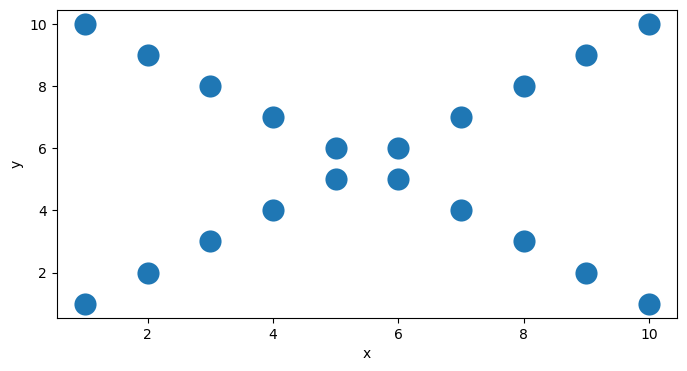

In [11]:
count = np.arange(10, 0, -1)
line0 = np.concatenate([count.reshape(1,-1), count.reshape(1,-1)]).T
line1 = np.concatenate([count.reshape(1,-1), np.sort(count, axis=0).reshape(1,-1)]).T
df = pd.DataFrame(np.concatenate([line0, line1]), columns=['x', 'y'])

sns.scatterplot(data=df, x='x', y='y', s=300)
plt.show()

### Connection
objects that are physically connected are thought of as part of a group

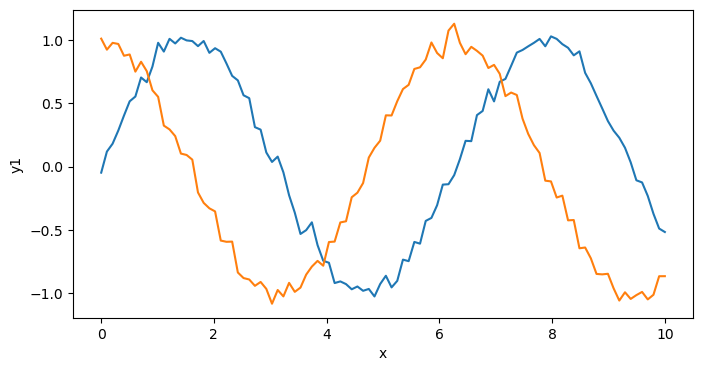

In [12]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x) + rng.normal(0, 0.05, len(x))
y2 = np.cos(x) + rng.normal(0, 0.05, len(x))
df = pd.DataFrame({'x': x, 'y1': y1, 'y2': y2})
sns.lineplot(data=df, x='x', y='y1', markers=True, dashes=False, errorbar=None)
sns.lineplot(data=df, x='x', y='y2', markers=True, dashes=False, errorbar=None)
plt.show()

## Plot examples
```{tip}
A lot of these examples come from Cole Nussbaumer Knaflic's great book: 
Storytelling with Data: A Data Visualization Guide for Business Professionals
```

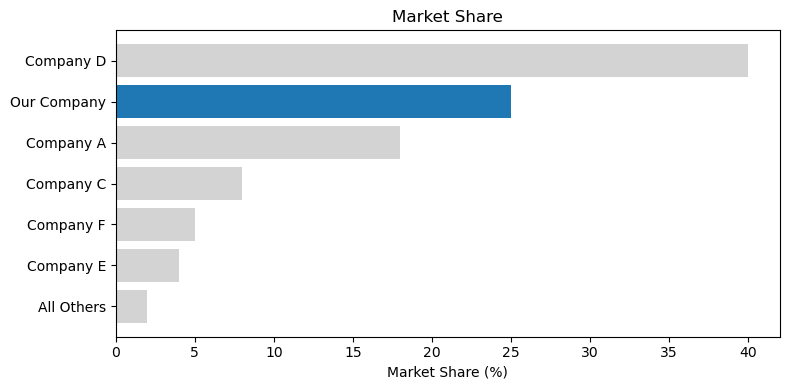

In [13]:
companies = ['Company D', 'Our Company', 'Company A', 'Company C', 'Company F', 'Company E', 'All Others']
market_share = [40, 25, 18, 8, 5, 4, 2]
colors = ['lightgray', 'tab:blue', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray']

plt.figure(figsize=(8, 4))
plt.barh(companies, market_share, color=colors)
plt.xlabel('Market Share (%)')
plt.title('Market Share')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

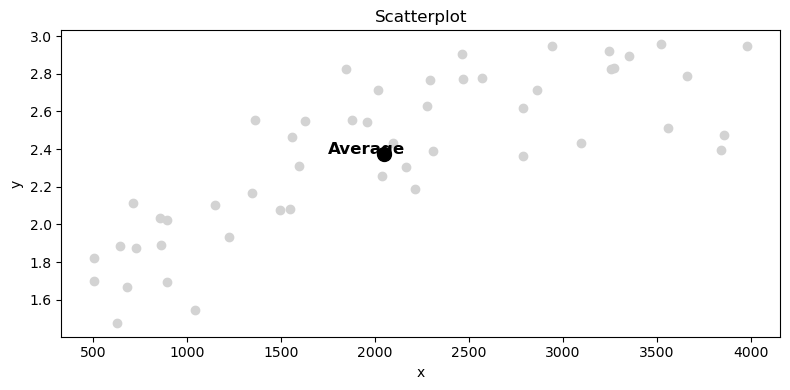

In [14]:
x = rng.uniform(500, 4000, 50)
y = 3 - 2 * np.exp(-x / 1500) + rng.normal(0, 0.2, 50)  # simulated trend with noise

plt.scatter(x, y, color='lightgray', label='Data')
plt.scatter(np.mean(x), np.mean(y), color='black', s=100, label='Average')
plt.text(np.mean(x) - 300, np.mean(y), 'Average', color='black', fontsize=12, weight='bold')
plt.title('Scatterplot')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

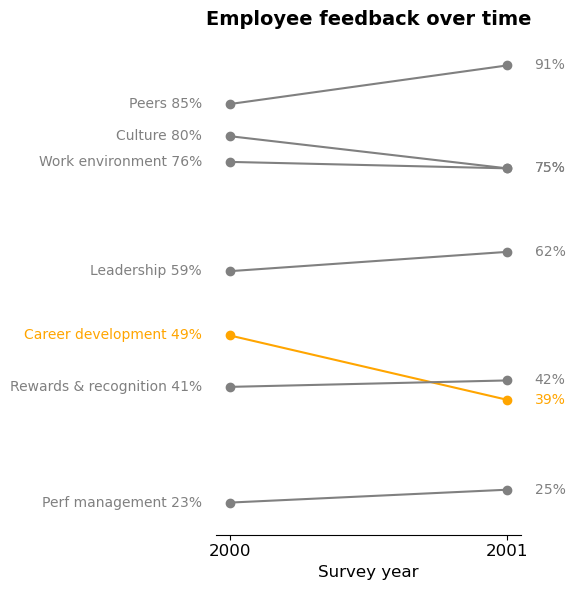

In [15]:
categories = ['Peers', 'Culture', 'Work environment', 'Leadership', 'Career development', 'Rewards & recognition', 'Perf management']
start_vals = [85, 80, 76, 59, 49, 41, 23]
end_vals = [91, 75, 75, 62, 39, 42, 25]
dates = [2000, 2001]
colors = ['gray', 'gray', 'gray', 'gray', 'orange', 'gray', 'gray']

fig, ax = plt.subplots(figsize=(6, 6))

for i, category in enumerate(categories):
    ax.plot(dates, [start_vals[i], end_vals[i]], marker='o', color=colors[i])
    ax.text(dates[0]-0.1, start_vals[i], f'{category} {start_vals[i]}%', va='center', ha='right', color=colors[i])
    ax.text(dates[1]+0.1, end_vals[i], f'{end_vals[i]}%', va='center', color=colors[i])

plt.title('Employee feedback over time', fontsize=14, weight='bold')
plt.xticks(dates, [str(date) for date in dates], fontsize=12)
plt.ylim(min(start_vals+end_vals)-5, max(start_vals+end_vals)+5)
ax.set_xlabel('Survey year', fontsize=12)
ax.set_ylabel('Percent favorable', fontsize=12)

# Hide the y-axis and spines for cleaner look
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

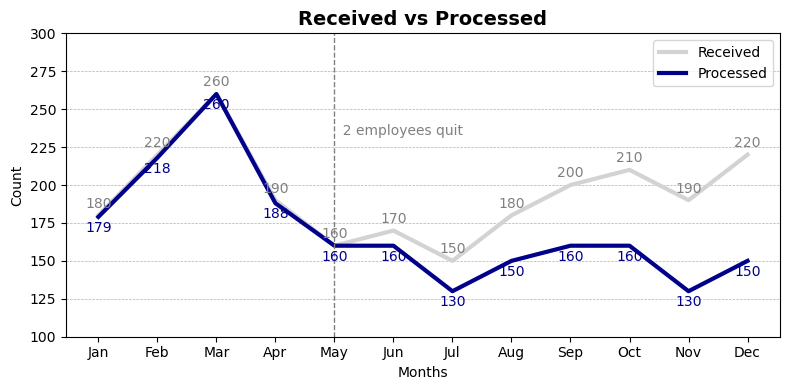

In [16]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
received = [180, 220, 260, 190, 160, 170, 150, 180, 200, 210, 190, 220]
processed = [v-(10*(i-4)) if i > 4 else v+rng.integers(low=-2, high=2) for i, v in enumerate(received)]

# Plot received data in gray and processed data in blue
plt.plot(months, received, color='lightgray', linewidth=3, label='Received')
plt.plot(months, processed, color='darkblue', linewidth=3, label='Processed')

# Annotate values on the plot
for i, (r, p) in enumerate(zip(received, processed)):
    plt.text(months[i], r + 5, str(r), color='gray', fontsize=10, ha='center')
    plt.text(months[i], p - 10, str(p), color='darkblue', fontsize=10, ha='center')


# Add title and labels
plt.title('Received vs Processed', fontsize=14, weight='bold')
plt.xlabel('Months')
plt.ylabel('Count')

plt.axvline(x='May', color='gray', linestyle='--', linewidth=1)
plt.text('May', 240, '  2 employees quit',
         color='gray', fontsize=10, va='top', ha='left')

plt.legend(loc='upper right')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.ylim(100, 300)
plt.tight_layout()
plt.show()


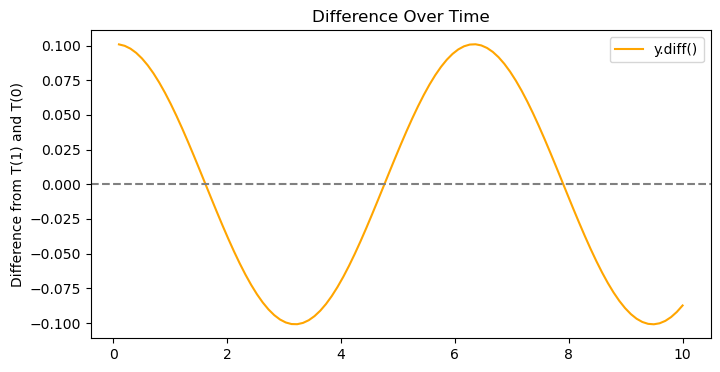

In [19]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
df = pd.DataFrame({'x': x, 'y': y})

plt.plot(df['x'], df['y'].diff(), color='orange', label='y.diff()')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Difference Over Time')
plt.ylabel('Difference from T(1) and T(0)')
plt.legend()
plt.show()

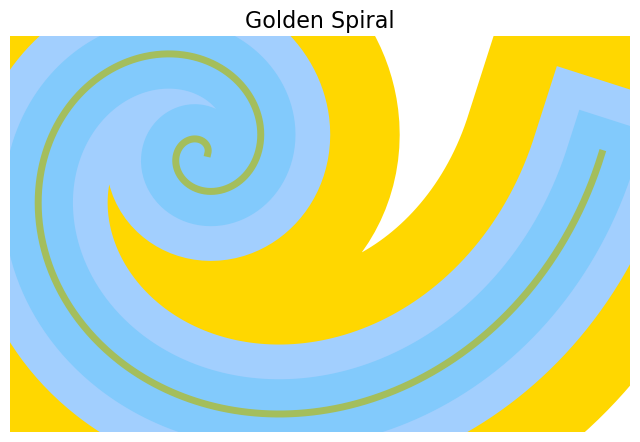

In [18]:
def golden_spiral(a=1, b=0.306349, num_points=1000):
    """
    Generate points for a golden spiral in polar coordinates and convert to Cartesian.
    
    Parameters:
    - a: scale factor
    - b: growth factor
    - num_points: number of points in the spiral
    """
    theta = np.linspace(0, 4 * np.pi, num_points)
    r = a * np.exp(b * theta)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

x, y = golden_spiral()
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x, y, color='gold', linewidth=200)
ax.plot(x, y, color='#a2cffe', linewidth=100)
ax.plot(x, y, color='#82cafc', linewidth=50)
ax.plot(x, y, color='#a4be5c', linewidth=5)
# ax.plot(x, y, color='gold', linewidth=200)
# ax.plot(x, y, color='gold', linewidth=200)
ax.set_aspect('equal')
ax.axis('off')
plt.title('Golden Spiral', fontsize=16)
plt.show()

seed: 42


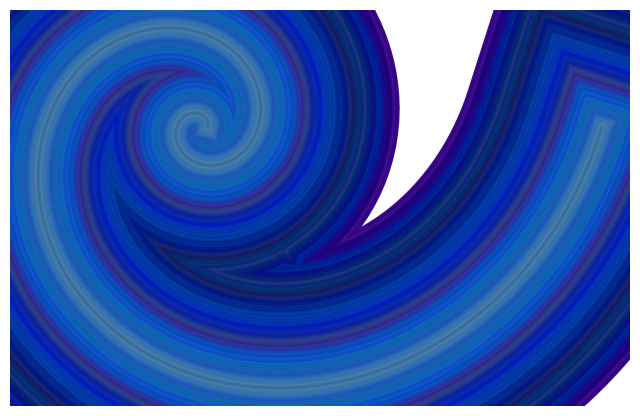

In [171]:
import random

def clamp(value, min_value=0, max_value=255):
    """Clamp the value between min_value and max_value."""
    return max(min_value, min(value, max_value))

def random_walk_color(n, step_size=30, seed=None):
    """
    Perform a random walk in RGB color space to generate n hex colors.

    Parameters:
    - n (int): Number of colors to generate.
    - step_size (int): Maximum change in each RGB channel per step.

    Returns:
    - List[str]: List of n hexadecimal color strings.
    """
    if seed is not None:
        random.seed(seed)
    print(f"seed: {seed}")

    # Initialize with a random starting color
    current_r = random.randint(0, 255)
    current_g = random.randint(0, 255)
    current_b = random.randint(0, 255)

    colors = [f'#{current_r:02X}{current_g:02X}{current_b:02X}']

    for _ in range(n - 1):
        # Random step for each channel
        step_r = random.randint(-step_size, step_size)
        step_g = random.randint(-step_size, step_size)
        step_b = random.randint(-step_size, step_size)

        # Update current color with clamping
        current_r = clamp(current_r + step_r)
        current_g = clamp(current_g + step_g)
        current_b = clamp(current_b + step_b)

        # Append the new color in hex format
        hex_color = f'#{current_r:02X}{current_g:02X}{current_b:02X}'
        colors.append(hex_color)

    return colors

num_colors = 100  # Number of colors to generate
step = 15        # Maximum step size per channel
widths = np.linspace(200, 1, num_colors)
x, y = golden_spiral()
hex_colors = random_walk_color(num_colors, step_size=step, seed=42)
# for idx, color in enumerate(hex_colors, 1):

fig, ax = plt.subplots(figsize=(8, 8))
for width, color in zip(widths, hex_colors):
    ax.plot(x, y, color=color, linewidth=width)

ax.set_aspect('equal')
ax.axis('off')
plt.show()

seed: None


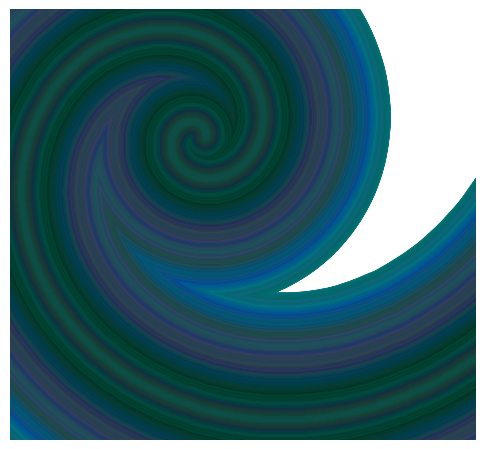

In [172]:
step = 10
hex_colors = random_walk_color(num_colors, step_size=step)

fig, ax = plt.subplots(figsize=(6, 6))
for width, color in zip(widths, hex_colors):
    ax.scatter(x, y, color=color, linewidth=width*.9, marker='.')

ax.set_aspect('equal')
ax.axis('off')
plt.xlim(-20, 30)
plt.show()

seed: 42


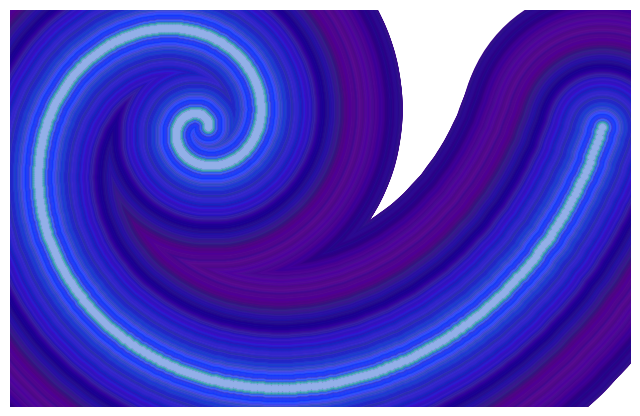

In [176]:
num_colors = 1000  # Number of colors to generate
step = 5       # Maximum step size per channel
widths = np.geomspace(200, 1, num_colors)
x, y = golden_spiral()
hex_colors = random_walk_color(num_colors, step_size=step, seed=42)
# for idx, color in enumerate(hex_colors, 1):

fig, ax = plt.subplots(figsize=(8, 8))
for width, color in zip(widths, hex_colors):
    # ax.plot(x, y, color=color, linewidth=width)
    ax.scatter(x, y, color=color, linewidth=width, marker='.')


ax.set_aspect('equal')
ax.axis('off')
plt.show()

In [15]:
# categories = ['A', 'B', 'C', 'D', 'E']
# values = [1, 6, 3, 5, 7]

# fig, axs = plt.subplots(1, 3, sharey=True)

# axs[0].bar(categories, values, width=0.2)
# axs[0].set_title('Too thin')
# axs[0].set_ylim(0, 8)
# axs[1].bar(categories, values, width=0.95)
# axs[1].set_title('Too thick')
# axs[2].bar(categories, values, width=0.7)
# axs[2].set_title('Just right')

# # Set common y-axis label
# for ax in axs:
#     ax.set_ylim(0, 8)

# plt.tight_layout()
# plt.show()